In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### fetching Kdd dataset
    This dataset consists of a lot 

In [2]:
df=pd.read_csv('train.csv')
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,b'tcp',b'http',b'SF',181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,b'normal.'
1,0,b'tcp',b'http',b'SF',239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,b'normal.'
2,0,b'tcp',b'http',b'SF',235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,b'normal.'
3,0,b'tcp',b'http',b'SF',219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,b'normal.'
4,0,b'tcp',b'http',b'SF',217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,b'normal.'


In [3]:
df['target']=df['target'].apply(lambda x: x[2:-2])


In [4]:
NORMAL= ['normal'] 
DOS=['neptune','back','teardrop','smurf','pod','land'] 
R2L=['warezclient','multihop','ftp_write','imap','guess_passwd','warezmaster','spy','phf']
U2R=['buffer_overflow','loadmodule','rootkit','perl']
PROBE=['portsweep','satan','ipsweep','nmap'] 
ans=[]
for i in df['target']:
    if(i in DOS):
        ans.append('DOS')
    elif(i in R2L):
        ans.append('R2L')
    elif(i in U2R):
        ans.append('U2R')
    elif(i in PROBE):
        ans.append('PROBE')
    elif(i in NORMAL):
        ans.append('NORMAL')
print(ans)
df['category']=ans
df.head()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,category
0,0,b'tcp',b'http',b'SF',181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal,NORMAL
1,0,b'tcp',b'http',b'SF',239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal,NORMAL
2,0,b'tcp',b'http',b'SF',235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal,NORMAL
3,0,b'tcp',b'http',b'SF',219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal,NORMAL
4,0,b'tcp',b'http',b'SF',217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal,NORMAL


In [5]:
df['label']=df['target'].map(lambda x: 'NORMAL' if x=="normal" else 'ATTACK')
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,category,label
0,0,b'tcp',b'http',b'SF',181,5450,0,0,0,0,...,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal,NORMAL,NORMAL
1,0,b'tcp',b'http',b'SF',239,486,0,0,0,0,...,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal,NORMAL,NORMAL
2,0,b'tcp',b'http',b'SF',235,1337,0,0,0,0,...,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal,NORMAL,NORMAL
3,0,b'tcp',b'http',b'SF',219,1337,0,0,0,0,...,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal,NORMAL,NORMAL
4,0,b'tcp',b'http',b'SF',217,2032,0,0,0,0,...,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal,NORMAL,NORMAL


In [6]:
df.groupby('target')['target'].count()

target
back                 2203
buffer_overflow        30
ftp_write               8
guess_passwd           53
imap                   12
ipsweep              1247
land                   21
loadmodule              9
multihop                7
neptune            107201
nmap                  231
normal              97278
perl                    3
phf                     4
pod                   264
portsweep            1040
rootkit                10
satan                1589
smurf              280790
spy                     2
teardrop              979
warezclient          1020
warezmaster            20
Name: target, dtype: int64

In [7]:
df.groupby('category')['target'].count()

category
DOS       391458
NORMAL     97278
PROBE       4107
R2L         1126
U2R           52
Name: target, dtype: int64

In [8]:
df.groupby('label')['target'].count()

label
ATTACK    396743
NORMAL     97278
Name: target, dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['protocol_type']=le.fit_transform(df['protocol_type'])
df['service']=le.fit_transform(df['service'])
df['flag']=le.fit_transform(df['flag'])
df['target']=le.fit_transform(df['target'])
df['category']=le.fit_transform(df['category'])
df['label']=le.fit_transform(df['label'])
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,category,label
0,0,1,22,9,181,5450,0,0,0,0,...,0.0,0.11,0.0,0.0,0.0,0.0,0.0,11,1,1
1,0,1,22,9,239,486,0,0,0,0,...,0.0,0.05,0.0,0.0,0.0,0.0,0.0,11,1,1
2,0,1,22,9,235,1337,0,0,0,0,...,0.0,0.03,0.0,0.0,0.0,0.0,0.0,11,1,1
3,0,1,22,9,219,1337,0,0,0,0,...,0.0,0.03,0.0,0.0,0.0,0.0,0.0,11,1,1
4,0,1,22,9,217,2032,0,0,0,0,...,0.0,0.02,0.0,0.0,0.0,0.0,0.0,11,1,1


In [10]:
df.groupby('target')['target'].count()

target
0       2203
1         30
2          8
3         53
4         12
5       1247
6         21
7          9
8          7
9     107201
10       231
11     97278
12         3
13         4
14       264
15      1040
16        10
17      1589
18    280790
19         2
20       979
21      1020
22        20
Name: target, dtype: int64

In [11]:
df.groupby('category')['target'].count()

category
0    391458
1     97278
2      4107
3      1126
4        52
Name: target, dtype: int64

In [12]:
df.groupby('label')['target'].count()

label
0    396743
1     97278
Name: target, dtype: int64

In [13]:
#taking the target variable as target ,category,label
target=df['target']
category=df['category']
label=df['label']
train=df.drop(['target','category','label'],axis=1)
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,1,22,9,181,5450,0,0,0,0,...,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0
1,0,1,22,9,239,486,0,0,0,0,...,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0
2,0,1,22,9,235,1337,0,0,0,0,...,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0
3,0,1,22,9,219,1337,0,0,0,0,...,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0
4,0,1,22,9,217,2032,0,0,0,0,...,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0


In [14]:
#MinMax Scaling
from sklearn.preprocessing import MinMaxScaler
minMax=MinMaxScaler()
train=minMax.fit_transform(train)

In [15]:
train[:2]

array([[0.00000000e+00, 5.00000000e-01, 3.38461538e-01, 9.00000000e-01,
        2.61041764e-07, 1.05713002e-03, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.56555773e-02, 1.56555773e-02,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.52941176e-02,
        3.52941176e-02, 1.00000000e+00, 0.00000000e+00, 1.10000000e-01,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 5.00000000e-01, 3.38461538e-01, 9.00000000e-01,
        3.44690506e-07, 9.42688423e-05, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00,

In [16]:
#This is score dictinoary
#score=np.array()

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(train,label,test_size=0.3,random_state=0)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(345814, 41)
(345814,)
(148207, 41)
(148207,)


In [18]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [19]:
clf.fit(x_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [20]:
arr=clf.predict(x_test)


In [21]:
clf.score(x_test,y_test)

0.9936845088288677

In [22]:
score=np.array([['label','train',np.float(clf.score(x_train,y_train))]])
score=np.append(score,np.array([['label','test',np.float(clf.score(x_test,y_test))]]),axis=0)

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, arr)

0.9936845088288677

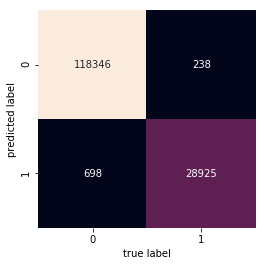

In [24]:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(y_test,arr)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.show()

## Making model for category variables

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(train,category,test_size=0.3,random_state=0)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(345814, 41)
(345814,)
(148207, 41)
(148207,)


In [26]:
clf.fit(x_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [27]:
arr=clf.predict(x_test)

In [28]:
clf.score(x_test,y_test)

0.9945414184215321

In [29]:
score=np.append(score,np.array([['category','train',np.float(clf.score(x_train,y_train))]]),axis=0)
score=np.append(score,np.array([['category','test',np.float(clf.score(x_test,y_test))]]),axis=0)

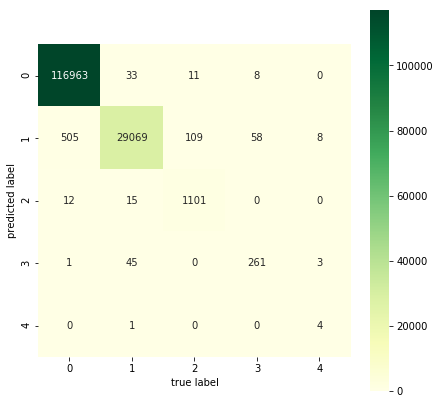

In [30]:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(y_test,arr)
plt.figure(figsize=(7,7))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,cmap="YlGn")
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.show()

## Model for all types of attacks

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(train,target,test_size=0.3,random_state=0)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(345814, 41)
(345814,)
(148207, 41)
(148207,)


In [32]:
clf.fit(x_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [33]:
arr=clf.predict(x_test)

In [34]:
clf.score(x_test,y_test)

0.9949125210010323

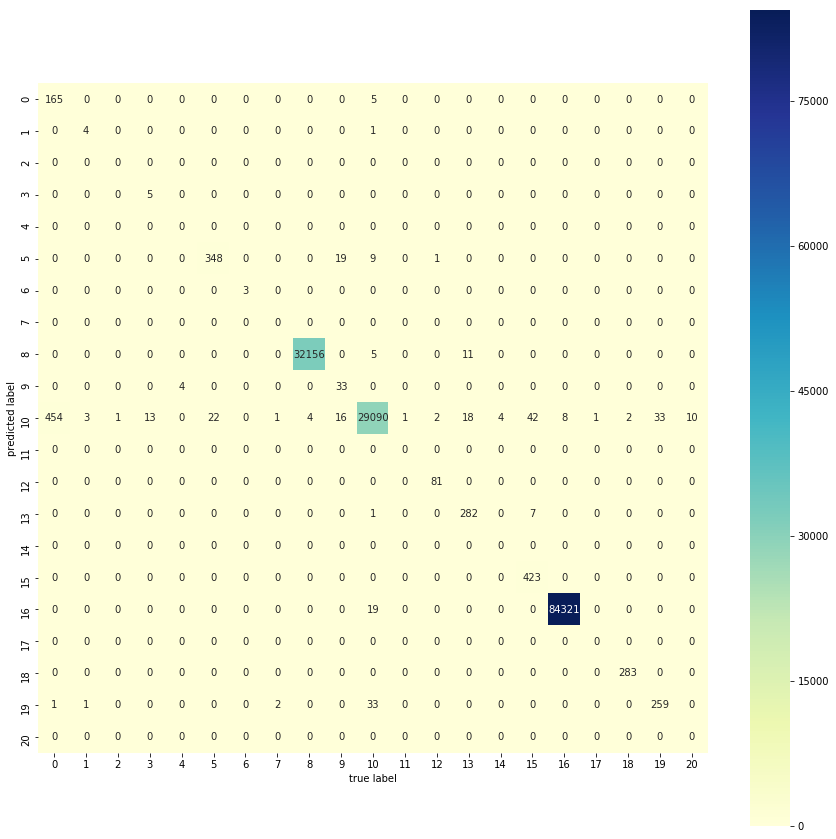

In [35]:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(y_test,arr)
plt.figure(figsize=(15,15))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,cmap="YlGnBu")
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.show()

In [36]:
score=np.append(score,np.array([['target','train',np.float(clf.score(x_train,y_train))]]),axis=0)
score=np.append(score,np.array([['target','test',np.float(clf.score(x_test,y_test))]]),axis=0)

In [37]:
score

array([['label', 'train', '0.9934386693424789'],
       ['label', 'test', '0.9936845088288677'],
       ['category', 'train', '0.9942975125356406'],
       ['category', 'test', '0.9945414184215321'],
       ['target', 'train', '0.9946242777909512'],
       ['target', 'test', '0.9949125210010323']], dtype='<U18')

In [38]:
result=pd.DataFrame(score,columns=['type','split','score'])
result.head()

,type,split,score
0,label,train,0.9934386693424789
1,label,test,0.9936845088288677
2,category,train,0.9942975125356406
3,category,test,0.9945414184215321
4,target,train,0.9946242777909512


In [39]:
result['score']=result['score'].astype(float)


In [40]:
result.dtypes

type      object
split     object
score    float64
dtype: object

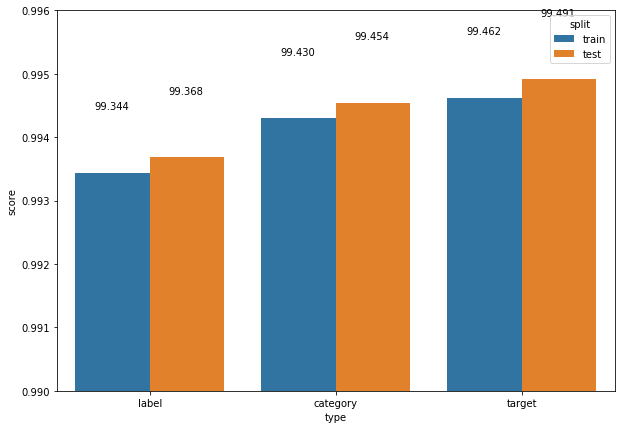

In [41]:
plt.figure(figsize=(10,7))
g=sns.barplot(x='type',y='score',hue='split',data=result)
for p in g.patches:
        g.annotate('{:.3f}'.format(p.get_height()*100), (p.get_x()+0.1, p.get_height()+0.001))
plt.ylim([0.99,0.996])
#plt.title('Accuracy under Different target cases')
plt.show()